In [28]:
%matplotlib inline
import sklearn
import sklearn.tree
import numpy as np
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics
import datetime
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('US_Accidents_Dec21_updated.csv')

In [16]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [17]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [18]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [53]:
df_va = df.loc[df['State'] == 'VA']

In [54]:
len(df_va.County.unique())

159

In [55]:
df_va.shape

(113535, 47)

In [56]:
df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [57]:
df_va.isnull().sum()

ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                      0
End_Lng                      0
Distance(mi)                 0
Description                  0
Number                   77362
Street                       0
Side                         0
City                         0
County                       0
State                        0
Zipcode                      4
Country                      0
Timezone                     4
Airport_Code              4182
Weather_Timestamp         6426
Temperature(F)            6957
Wind_Chill(F)            17297
Humidity(%)               7038
Pressure(in)              6741
Visibility(mi)            6918
Wind_Direction            6876
Wind_Speed(mph)           9918
Precipitation(in)        18132
Weather_Condition         7498
Amenity                      0
Bump                         0
Crossing

In [58]:
#Total missing values per column

df_va.isnull().sum().sort_values(ascending=False)

Number                   77362
Precipitation(in)        18132
Wind_Chill(F)            17297
Wind_Speed(mph)           9918
Weather_Condition         7498
Humidity(%)               7038
Temperature(F)            6957
Visibility(mi)            6918
Wind_Direction            6876
Pressure(in)              6741
Weather_Timestamp         6426
Airport_Code              4182
Nautical_Twilight           53
Civil_Twilight              53
Sunrise_Sunset              53
Astronomical_Twilight       53
Zipcode                      4
Timezone                     4
Crossing                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Turning_Loop                 0
Traffic_Signal               0
Traffic_Calming              0
Stop                         0
Station                      0
Roundabout                   0
Railway                      0
No_Exit                      0
Junction                     0
Give_Way                     0
Bump    

In [59]:
# percentage of missing values column wise
missing_val_in_each_col_per= (df_va.isnull().sum().sort_values(ascending=False)/len(df_va))*100
missing_val_in_each_col_per

Number                   68.139340
Precipitation(in)        15.970406
Wind_Chill(F)            15.234950
Wind_Speed(mph)           8.735632
Weather_Condition         6.604131
Humidity(%)               6.198969
Temperature(F)            6.127626
Visibility(mi)            6.093275
Wind_Direction            6.056282
Pressure(in)              5.937376
Weather_Timestamp         5.659929
Airport_Code              3.683446
Nautical_Twilight         0.046682
Civil_Twilight            0.046682
Sunrise_Sunset            0.046682
Astronomical_Twilight     0.046682
Zipcode                   0.003523
Timezone                  0.003523
Crossing                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                      0.000000
Station                   0.000000
Roundabout                0.000000
Railway             

Text(0, 0.5, 'Columns')

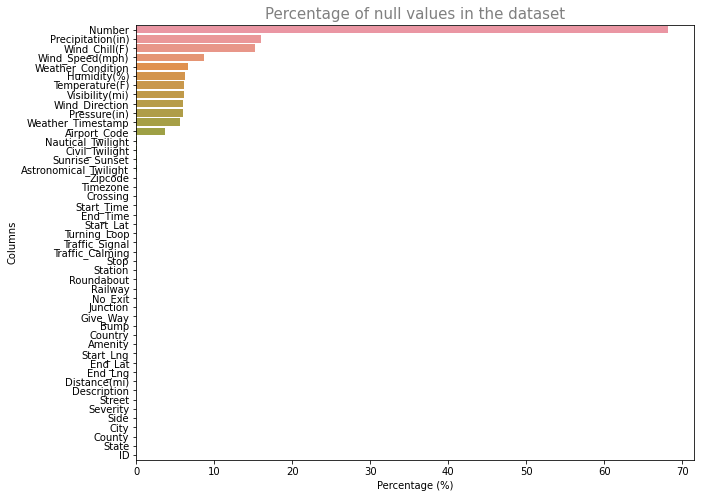

In [60]:
plt.figure(figsize=(10,8))
sns.barplot(y=missing_val_in_each_col_per.index, x=missing_val_in_each_col_per)
plt.title("Percentage of null values in the dataset",size=15,color="grey")
plt.xlabel('Percentage (%)')
plt.ylabel('Columns')

In [61]:
# Removing Number column as it has 68% of missing values

df_va = df_va.drop(['Number','Wind_Chill(F)', 'Precipitation(in)'], axis=1)

In [62]:
# Removing useless features
'''
Features "ID" doesn't offer any pertinent accident-related information.
Since they can only be gathered after the accident has already occurred, "Description",Distance(mi)," "End_Time, "End_Lat," 
"End_Lng", 'Wind_Chill(F)', and 'Precipitation(in)' cannot be used as predictors for major accident prediction.
'''

df_va = df_va.drop(['ID','Description','Distance(mi)','End_Time','End_Lat', 'End_Lng' ], axis=1)

In [63]:
#dropna
'''
The counts of missing values in the rest features are much smaller compared to the total sample. 
It is convenient to drop rows with missing values in these columns.
'City'
'Zipcode'
'Airport_Code'
'Sunrise_Sunset'
'Civil_Twilight'
'Nautical_Twilight'
'Astronomical_Twilight'
'''
df_va = df_va.dropna(subset=['City','Zipcode','Airport_Code',
                       'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

In [64]:
df_va.shape

(109310, 38)

In [31]:
# fix datetime type
df_va['Start_Time'] = pd.to_datetime(df_va['Start_Time'])
df_va['End_Time'] = pd.to_datetime(df_va['End_Time'])
df_va['Weather_Timestamp'] = pd.to_datetime(df_va['Weather_Timestamp'])

# calculate duration as the difference between end time and start time in minute
df_va['Duration'] = df_va.End_Time - df_va.Start_Time 
df_va['Duration'] = df_va['Duration'].apply(lambda x:round(x.total_seconds() / 60) )
print("The overall mean duration is: ", (round(df_va['Duration'].mean(),3)), 'min')

The overall mean duration is:  172.617 min


In [72]:
#Top 10 cities in Virginia with the most number of accidents
top_cities=df_va['City'].value_counts().head(10)
top_cities

Richmond          11990
Norfolk            4068
Fairfax            3763
Fredericksburg     3311
Virginia Beach     3177
Henrico            3175
Alexandria         3076
Chesapeake         3048
Woodbridge         2921
Arlington          2823
Name: City, dtype: int64

Text(0, 0.5, 'No. of cases')

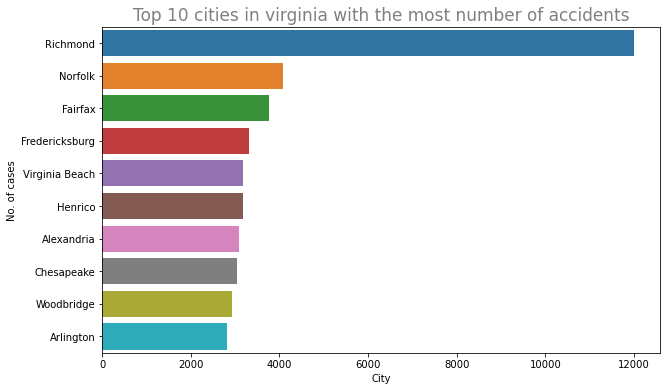

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(y=top_cities.index, x=top_cities)
plt.title("Top 10 cities in virginia with the most number of accidents",size=17,color="grey")
plt.xlabel('City')
plt.ylabel('No. of cases')

In [74]:
#Top 10 cities in Virginia with the least number of accidents
top_cities=df_va['City'].value_counts().sort_values(ascending=True).head(10)
top_cities

Hiltons        1
Catoctin       1
Middlebrook    1
Elk Creek      1
Cleveland      1
Ebony          1
Green Bay      1
Rose Hill      1
Phenix         1
Free Union     1
Name: City, dtype: int64

Text(0, 0.5, 'No. of cases')

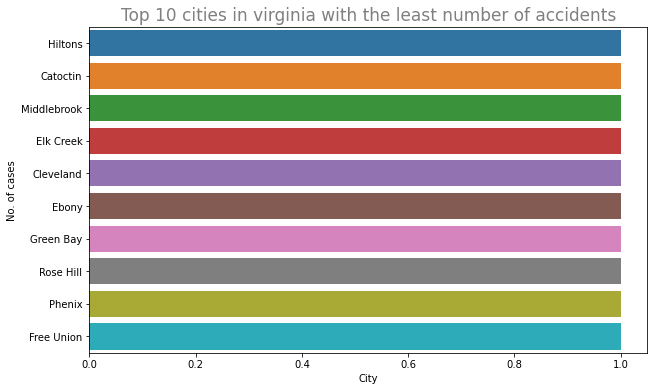

In [97]:
plt.figure(figsize=(10,6))
sns.barplot(y=top_cities.index, x=top_cities)
plt.title("Top 10 cities in virginia with the least number of accidents",size=17,color="grey")
plt.xlabel('City')
plt.ylabel('No. of cases')

In [80]:
#Top streets which had most accidents
top_streets=df_va['Street'].value_counts().head(10)
top_streets

I-95 N               7688
I-95 S               6637
I-64 E               6403
I-64 W               5758
I-81 N               4171
I-81 S               3683
I-66 E               3284
I-66 W               2329
Capital Beltway N    1496
Capital Beltway S    1495
Name: Street, dtype: int64

Text(0, 0.5, 'No. of accidents')

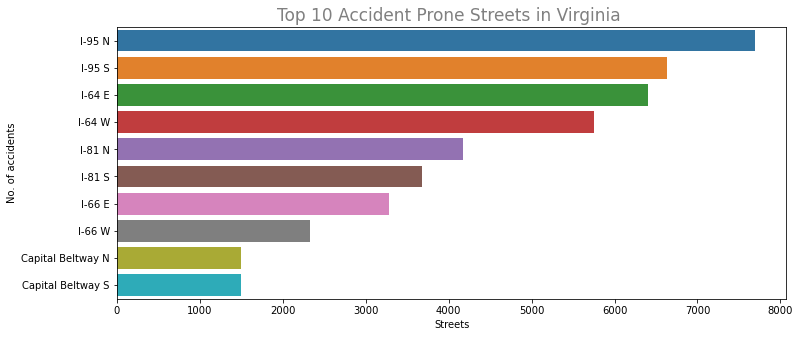

In [82]:
plt.figure(figsize=(12,5))
sns.barplot(y=top_streets.index, x=top_streets)
plt.title("Top 10 Accident Prone Streets in Virginia ",size=17,color="grey")
plt.xlabel('Streets')
plt.ylabel('No. of accidents')

In [85]:
#Month wise accident analysis
df_va.Start_Time = pd.to_datetime(df_va.Start_Time)
max_month=df_va.Start_Time.dt.month_name().value_counts()
max_month

December     18002
November     15739
October      12016
September     9229
June          8927
April         7452
May           7358
August        7156
July          6604
January       5759
February      5748
March         5320
Name: Start_Time, dtype: int64

Text(0, 0.5, 'No. of accidents')

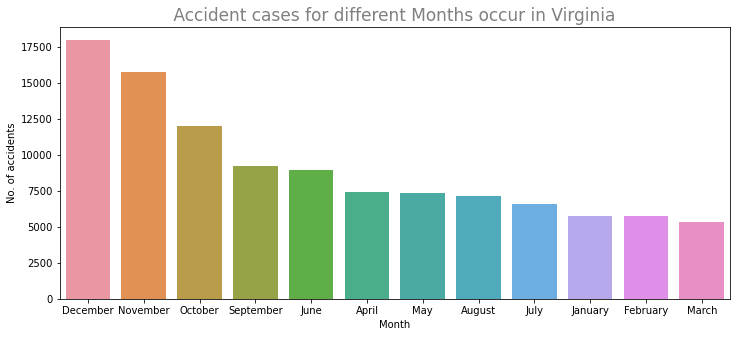

In [86]:
plt.figure(figsize=(12,5))
sns.barplot(y=max_month, x=max_month.index)
plt.title(" Accident cases for different Months occur in Virginia ",size=17,color="grey")
plt.xlabel('Month')
plt.ylabel('No. of accidents')

In [88]:
#Year wise accident analysis
max_year=df_va.Start_Time.dt.year.value_counts()
max_year

2021    69078
2020    24236
2018     5106
2017     4349
2019     4033
2016     2508
Name: Start_Time, dtype: int64

Text(0, 0.5, 'No. of accidents')

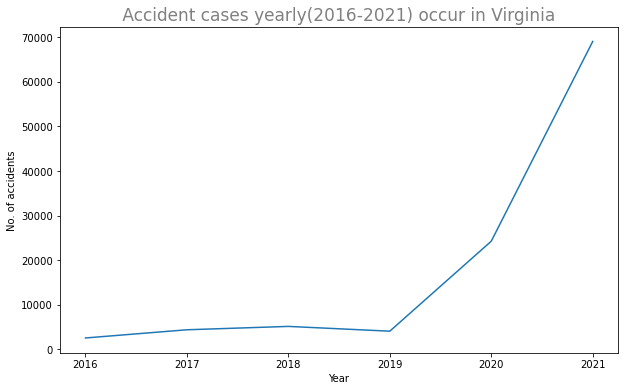

In [89]:
plt.figure(figsize=(10,6))
sns.lineplot(data=max_year)
plt.title(" Accident cases yearly(2016-2021) occur in Virginia ",size=17,color="grey")
plt.xlabel('Year')
plt.ylabel('No. of accidents')

In [94]:
#Hour wise accident analysis
max_hour=df_va.Start_Time.dt.hour.value_counts()
max_hour

16    8961
17    8804
15    8314
14    7446
18    6747
13    6197
12    5821
7     4999
11    4953
8     4946
19    4621
10    4242
6     4160
9     4150
20    3491
21    3098
22    2928
5     2729
23    2690
0     2537
1     2157
2     1999
4     1705
3     1615
Name: Start_Time, dtype: int64

Text(0, 0.5, 'No. of accidents')

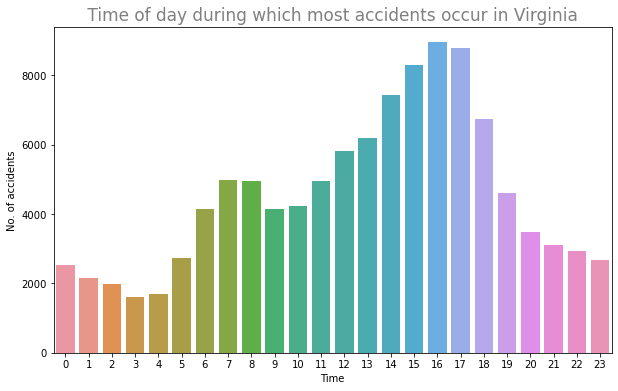

In [96]:
plt.figure(figsize=(10,6))
sns.barplot(y=max_hour, x=max_hour.index)
plt.title(" Time of day during which most accidents occur in Virginia ",size=17,color="grey")
plt.xlabel('Time')
plt.ylabel('No. of accidents')

In [98]:
weather_effect=df_va["Weather_Condition"].value_counts().head()
weather_effect

Fair             42432
Cloudy           16538
Mostly Cloudy    14803
Partly Cloudy     9427
Light Rain        5734
Name: Weather_Condition, dtype: int64

Text(0, 0.5, 'No. of accidents')

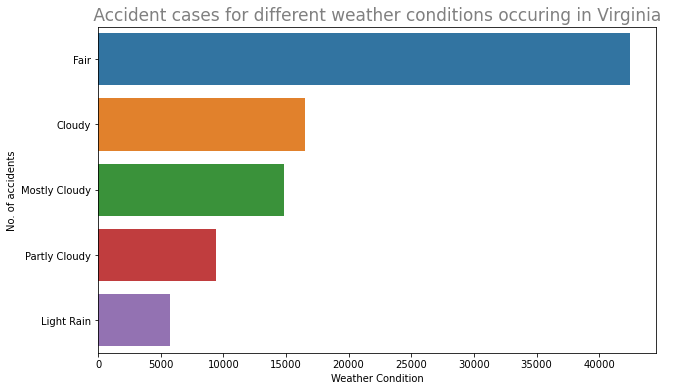

In [100]:
plt.figure(figsize=(10,6))
sns.barplot(x=weather_effect, y=weather_effect.index)
plt.title(" Accident cases for different weather conditions occuring in Virginia ",size=17,color="grey")
plt.xlabel('Weather Condition')
plt.ylabel('No. of accidents')

In [90]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
def convert_categorical(X):
    columns = ["County"]
    indices = X.index
    anew_columns = []
    encoded_x = None
    for i in range(0, len(columns)):
        if X[columns[i]].dtype!='O': continue
        label_encoder = LabelEncoder()
        le = label_encoder.fit(X[columns[i]].apply(str))
        for class_ in le.classes_:
            new_columns.append("{}_{}".format(columns[i],class_))
        feature = le.transform(X[columns[i]].apply(str))
        feature = feature.reshape(X.shape[0], 1)
        onehot_encoder = OneHotEncoder(sparse=False)
        onehot_encoder.fit(feature)
        feature = onehot_encoder.transform(feature)
        if encoded_x is None:
            encoded_x = feature
        else:
            encoded_x = np.concatenate((encoded_x, feature), axis=1)
        X = X.drop(columns[i], axis=1)
    new_columns.extend(X.columns)
    X = pd.DataFrame(np.concatenate([encoded_x,X],axis=1),index=indices,columns=new_columns)
    return X

In [91]:
df_va = convert_categorical(df_va)

In [92]:
df_va.shape

(109310, 193)

In [93]:
df_va.head()

,County_Accomack,County_Albemarle,County_Alexandria,County_Alexandria City,County_Alleghany,County_Amelia,County_Amherst,County_Appomattox,County_Arlington,County_Augusta,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
31731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,Night,Night,Night,Day
31732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,Night,Night,Night,Day
31733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,Night,Night,Night,Day
31736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,Night,Night,Night,Day
31750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,Night,Night,Day,Day
